In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression,Lasso
from sklearn.feature_selection import VarianceThreshold,SelectKBest, chi2,SelectFromModel
from sklearn.svm import LinearSVC,SVC
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA

In [3]:
npf = pd.read_csv('../data/npf_train.csv')

In [4]:
def clean_df(df):
    df = df.set_index('date')
    df.drop(columns= ['id','partlybad'],axis=1,inplace=True)
    df['class2'] = (df['class4'] != 'nonevent').astype(int)
    df.drop(columns=['class4'],axis=1,inplace=True)
    return df

In [5]:
npf = clean_df(npf)
npf.head()

,CO2168.mean,CO2168.std,CO2336.mean,CO2336.std,CO242.mean,CO242.std,CO2504.mean,CO2504.std,Glob.mean,Glob.std,...,T672.std,T84.mean,T84.std,UV_A.mean,UV_A.std,UV_B.mean,UV_B.std,CS.mean,CS.std,class2
date,,,,,,,,,,,,,,,,,,,,,
2000-01-17,368.771711,0.310309,368.665658,0.305127,369.371184,0.333606,368.616053,0.302364,41.650106,29.942679,...,0.250952,-0.899393,0.271648,2.492491,1.310880,0.031587,0.018122,0.000243,0.000035,1
2000-02-28,378.197295,1.001493,378.083089,1.025472,378.671311,1.017208,378.029508,1.022258,3.478842,2.165706,...,0.313460,2.033191,0.271090,0.295937,0.177836,0.005140,0.003552,0.003658,0.000940,0
2000-03-24,373.043158,0.749865,372.930066,0.728411,373.569735,0.835240,372.869868,0.692828,297.954063,188.348344,...,2.037111,0.780422,2.334741,14.434789,8.627312,0.353743,0.272472,0.000591,0.000191,1
2000-03-30,375.643019,0.558629,375.549430,0.540964,376.045849,0.580730,375.506013,0.529970,324.318386,193.207278,...,2.509758,6.533544,2.695277,16.077513,9.984686,0.568242,0.451830,0.002493,0.000466,1
2000-04-04,377.661030,0.408421,377.609576,0.423963,378.117134,0.417243,377.582242,0.424460,167.479964,135.294894,...,1.438071,2.133774,1.614122,9.710422,7.054069,0.339135,0.291457,0.004715,0.000679,0


In [6]:
test = pd.read_csv('../data/npf_test_hidden.csv')

In [7]:
test = clean_df(test)

In [8]:
test = test.reset_index()
test.drop(columns=['date'],axis=1,inplace=True)

In [9]:
X = npf.iloc[:,:100]
y = npf.iloc[:,100:]

In [10]:
y_test = test['class2']
X_test = test.drop(['class2'],axis=1)

In [11]:
y = y.to_numpy().ravel()

In [12]:
X.columns

Index(['CO2168.mean', 'CO2168.std', 'CO2336.mean', 'CO2336.std', 'CO242.mean',
       'CO242.std', 'CO2504.mean', 'CO2504.std', 'Glob.mean', 'Glob.std',
       'H2O168.mean', 'H2O168.std', 'H2O336.mean', 'H2O336.std', 'H2O42.mean',
       'H2O42.std', 'H2O504.mean', 'H2O504.std', 'H2O672.mean', 'H2O672.std',
       'H2O84.mean', 'H2O84.std', 'NET.mean', 'NET.std', 'NO168.mean',
       'NO168.std', 'NO336.mean', 'NO336.std', 'NO42.mean', 'NO42.std',
       'NO504.mean', 'NO504.std', 'NO672.mean', 'NO672.std', 'NO84.mean',
       'NO84.std', 'NOx168.mean', 'NOx168.std', 'NOx336.mean', 'NOx336.std',
       'NOx42.mean', 'NOx42.std', 'NOx504.mean', 'NOx504.std', 'NOx672.mean',
       'NOx672.std', 'NOx84.mean', 'NOx84.std', 'O3168.mean', 'O3168.std',
       'O342.mean', 'O342.std', 'O3504.mean', 'O3504.std', 'O3672.mean',
       'O3672.std', 'O384.mean', 'O384.std', 'Pamb0.mean', 'Pamb0.std',
       'PAR.mean', 'PAR.std', 'PTG.mean', 'PTG.std', 'RGlob.mean', 'RGlob.std',
       'RHIRGA168.

In [13]:
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
n_d = sel.fit_transform(X)

In [14]:
n_d.shape

(464, 81)

In [15]:
cols = sel.get_feature_names_out()

<AxesSubplot:>

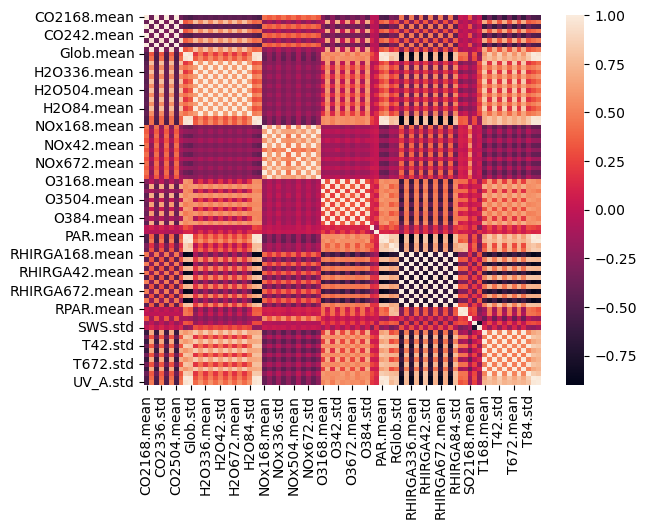

In [16]:
sns.heatmap(X[cols].corr())

### Baseline model NB

In [17]:
m_NB = GaussianNB()
m_NB.fit(X,y)

GaussianNB()

In [18]:
y_pred = m_NB.predict(X_test)

In [19]:
accuracy_score(y_test,y_pred)

0.5243523316062176

In [20]:
stS = StandardScaler()
x_st = stS.fit_transform(X)

In [21]:
x_st

array([[-1.20171826, -0.87606404, -1.21532854, ..., -1.21503286,
        -1.26863271, -0.87497345],
       [-0.35012399, -0.66131433, -0.36255114, ..., -1.26584986,
         0.32451211,  0.37680799],
       [-0.8157963 , -0.73949481, -0.82917328, ..., -0.32789791,
        -1.10645705, -0.6590614 ],
       ...,
       [-0.25238127,  2.77012833, -0.2466434 , ..., -0.00904741,
         0.24339852, -0.29073604],
       [ 0.21423913,  1.02012399,  0.20624012, ...,  0.79713975,
         0.84870338,  0.57412869],
       [ 0.01430359,  1.01831305,  0.0327594 , ...,  1.24191207,
         1.86317468, -0.08551394]])

In [22]:
selk = SelectKBest(chi2, k=20)
#n_dk = selk.fit_transform(x_st, y)

In [23]:
pipe = Pipeline([('scaler',StandardScaler()),('lasso',Lasso(alpha=0.1))])

In [24]:
reg = pipe.fit(X, y)

In [25]:
#fig, ax = plt.subplots(figsize=(12, 10))

#ax.plot(X.columns, reg['lasso'].coef_, color='#111111')

#plt.setp(ax.get_xticklabels(), rotation=90)

In [26]:
lsvc = LinearSVC(C=0.1, penalty="l1", dual=False,max_iter=400).fit(x_st, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.fit_transform(x_st)
X_new.shape

C:\Users\srodriguezb\Anaconda3\envs\introds\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


(464, 26)

In [27]:
model.threshold_

1e-05

In [28]:
model.estimator_.coef_

array([[ 0.        ,  0.09562286,  0.        ,  0.        , -0.21273663,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.08781323,  0.        , -0.16208157,  0.        ,  0.        ,
         0.        , -0.09516015,  0.        ,  0.        , -0.03094499,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.09286856,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.04638837,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.05962206,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.29272565,
         0.        ,  0.        ,  0.01433038,  0.        ,  0.09795197,
         0.        ,  0.        , -0.03562122,  0.0275622 ,  0.12295768,
         0.        ,  0.        ,  0.        , -0.4

In [29]:
model.get_support()

array([False,  True, False, False,  True, False, False, False, False,
       False,  True, False,  True, False, False, False,  True, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
        True, False, False,  True, False,  True, False, False,  True,
        True,  True, False, False, False,  True, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
        True,  True,  True, False, False, False, False, False, False,
       False,  True, False, False, False,  True, False,  True,  True,
        True])

In [30]:
X_f = npf[X.columns[model.get_support()]]

In [31]:
X_test_df = test[X_test.columns[model.get_support()]]

### Logistic Regression 

In [32]:
pipe = Pipeline([('scaler',StandardScaler()),('lasso',LogisticRegression(penalty='none',solver="saga",max_iter=500))])

In [33]:
#clf = LogisticRegression(penalty='none',solver="saga",max_iter=500)
pipe.fit(X_f,y)

C:\Users\srodriguezb\Anaconda3\envs\introds\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('lasso',
                 LogisticRegression(max_iter=500, penalty='none',
                                    solver='saga'))])

In [34]:
y_pred = pipe.predict(X_test_df)

In [35]:
accuracy_score(y_pred,y_test)

0.48911917098445595

In [36]:
pipe2 = Pipeline([('scaler',StandardScaler()),('lasso',LogisticRegression(penalty='l1',C = 1/0.01,solver="saga",max_iter=500))])
#clf2 = LogisticRegression(penalty='l1',C = 1/0.01,solver="saga",max_iter=500)
pipe2.fit(X_f,y)

C:\Users\srodriguezb\Anaconda3\envs\introds\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('lasso',
                 LogisticRegression(C=100.0, max_iter=500, penalty='l1',
                                    solver='saga'))])

In [37]:
y_pred = pipe2.predict(X_test_df)

In [38]:
accuracy_score(y_pred,y_test)

0.48911917098445595

In [39]:
X_train_sel = npf[cols]

In [40]:
X_test_sel = test[cols]

In [41]:
pipe2 = Pipeline([('scaler',StandardScaler()),('lasso',LogisticRegression(penalty='l1',C = 1/0.01,solver="saga",max_iter=500))])
#clf2 = LogisticRegression(penalty='l1',C = 1/0.01,solver="saga",max_iter=500)
pipe2.fit(X_train_sel,y)

C:\Users\srodriguezb\Anaconda3\envs\introds\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('lasso',
                 LogisticRegression(C=100.0, max_iter=500, penalty='l1',
                                    solver='saga'))])

In [42]:
y_pred = pipe2.predict(X_test_sel)

In [43]:
accuracy_score(y_pred,y_test)

0.48704663212435234

### Random Forest

In [44]:
rf = RandomForestClassifier(max_depth=2, random_state=0)

In [45]:
rf.fit(X_train_sel,y)

RandomForestClassifier(max_depth=2, random_state=0)

In [46]:
y_pred= rf.predict(X_test_sel)

In [47]:
accuracy_score(y_pred,y_test)

0.46010362694300516

In [48]:
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(X_f,y)
y_pred= rf.predict(X_test_df)
accuracy_score(y_pred,y_test)

0.44766839378238343

In [49]:
pipeline = Pipeline([('scaler',StandardScaler()),('RF',RandomForestClassifier(max_depth=2, random_state=0))])

In [50]:
pipeline.fit(X_train_sel,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('RF', RandomForestClassifier(max_depth=2, random_state=0))])

In [51]:
y_pred= pipeline.predict(X_test_sel)

In [52]:
accuracy_score(y_pred,y_test)

0.46010362694300516

In [53]:
pipeline2 = Pipeline([('scaler',StandardScaler()),('RF',RandomForestClassifier(max_depth=2, random_state=0))])
pipeline2.fit(X_f,y)
y_pred= pipeline2.predict(X_test_df)
accuracy_score(y_test,y_pred)

0.44766839378238343

## Try with PCA

In [54]:
colss = []
for i in X.columns:
    if 'mean' in i:
        colss.append(i)

In [55]:
X_means = X[colss]

First, we apply a Standard Scaler because the PCA assumes the data is center-zero. Then with the new vectors, train the model.

In [59]:
std = StandardScaler()
X_scaled =std.fit_transform(X)
X_test_scaled = std.transform(X_test)

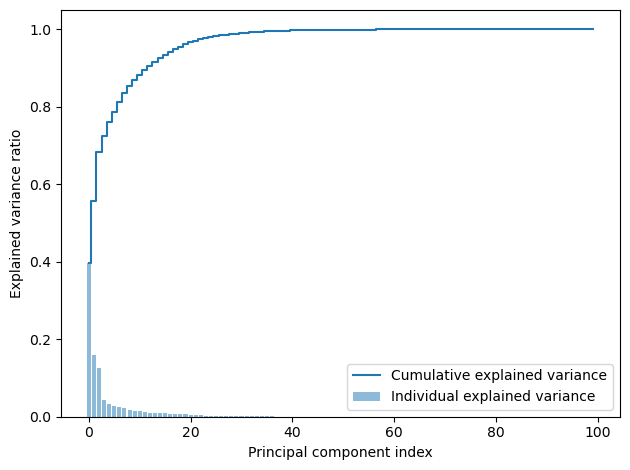

In [60]:
pca = PCA()
#
# Determine transformed features
#
X_train_pca = pca.fit_transform(X_scaled)
#
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [61]:
pca = PCA(n_components=40)
X_pca = pca.fit_transform(X_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [62]:
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(X_pca,y)

RandomForestClassifier(max_depth=2, random_state=0)

In [63]:
y_pred = rf.predict(X_test_pca)

In [64]:
accuracy_score(y_test,y_pred)

0.43212435233160623

In [65]:
pipe = Pipeline([('scaler',StandardScaler()),('pca',PCA(n_components=20)),('SVC',SVC(random_state=42))])
pipe.fit(X_means,y)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=20)),
                ('SVC', SVC(random_state=42))])

In [66]:
X_test = X_test[colss]

In [67]:
y_pred = pipe.predict(X_test)

In [68]:
accuracy_score(y_test,y_pred)

0.44041450777202074